<a href="https://colab.research.google.com/github/OConnorsphysics/Uleth_Data_Science/blob/main/Liams_Project3_TopShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='lightblue'>Can We Accurately Predict NBA Digital Card Prices?</font>

![picture](https://drive.google.com/uc?export=view&id=1eXpMZeXVoQIAIRE12_w3Fbj4rTAasbgs)


In this project we will take on the roll of an advisor working for a rich basketball collector. We have been tasked with analyzing the values of NBA digital trading cards, called moments, on NBAtopshot.com. Our collector wants to find cards on the marketplace that are underpriced. Our task will be to develop a machine learning model that can correctly predict the value of a moment, based off the current market floor prices. 


Import python libraries


In [ ]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import OrdinalEncoder

## <font color='lightblue'>Data Understanding </font>

I am importing a dataset of listing info for digital NBA trading cards. The price of moments is set by the current owner where the 'Lowest Ask' column is the price of the lowest card version for sale on the marketplace. Prices fluctuate wildly based on player, play type, team and other factors. I chose this dataset as it is quite complete, with no missing values. The challenges will come from the dataset having many classes and high value fluctuations. Data was taken from user RickyDC01 on Kaggle. Who scraped this data in July 2021 from the NBA TopShot Marketplace, as well as a secondary analysis site (evaluate.market).

Import our data into colaboratory.


In [ ]:
df_topshot = pd.read_csv('/content/series_info_final.csv')
df_topshot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       885 non-null    object
 1   Moment Type      885 non-null    object
 2   Link             885 non-null    object
 3   Moment Date      885 non-null    object
 4   Team             885 non-null    object
 5   Lowest Ask       885 non-null    int64 
 6   Num Listings     885 non-null    int64 
 7   Moment Rarity    885 non-null    object
 8   Edition Size     885 non-null    int64 
 9   Limited Edition  885 non-null    bool  
 10  Series           885 non-null    object
dtypes: bool(1), int64(3), object(7)
memory usage: 70.1+ KB


In [ ]:
df_topshot

,Unnamed: 0,Moment Type,Link,Moment Date,Team,Lowest Ask,Num Listings,Moment Rarity,Edition Size,Limited Edition,Series
0,DANNY GREEN,Assist,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 2 2020,LAL,4875,15,Legendary,79,True,2020 NBA Finals (Series 1)
1,TYLER HERRO,Layup,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 4 2020,MIA,13999,12,Legendary,79,True,2020 NBA Finals (Series 1)
2,LEBRON JAMES,Dunk,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 11 2020,LAL,70000,7,Legendary,79,True,2020 NBA Finals (Series 1)
3,JIMMY BUTLER,Dunk,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 4 2020,MIA,10995,11,Legendary,79,True,2020 NBA Finals (Series 1)
4,RAJON RONDO,Assist,https://www.nbatopshot.com/listings/p2p/320cae...,Oct 2 2020,LAL,7995,9,Legendary,79,True,2020 NBA Finals (Series 1)
...,...,...,...,...,...,...,...,...,...,...,...
880,DONOVAN MITCHELL,Assist,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 19 2021,UTA,140,583,Common,8888,True,The Gift (Series 2)
881,CJ MCCOLLUM,Jump Shot,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 9 2021,POR,97,593,Common,8888,True,The Gift (Series 2)
882,RUI HACHIMURA,Layup,https://www.nbatopshot.com/listings/p2p/0a528e...,Feb 2 2021,WAS,90,581,Common,8888,True,The Gift (Series 2)
883,JIMMY BUTLER,Layup,https://www.nbatopshot.com/listings/p2p/0a528e...,Jan 6 2021,MIA,102,611,Common,8888,True,The Gift (Series 2)


As most of the data is categorical the describe method coveys little information.

In [ ]:
df_topshot.dtypes

Unnamed: 0         object
Moment Type        object
Link               object
Moment Date        object
Team               object
Lowest Ask          int64
Num Listings        int64
Moment Rarity      object
Edition Size        int64
Limited Edition      bool
Series             object
dtype: object

In [ ]:
df_topshot.isnull().sum()

Unnamed: 0         0
Moment Type        0
Link               0
Moment Date        0
Team               0
Lowest Ask         0
Num Listings       0
Moment Rarity      0
Edition Size       0
Limited Edition    0
Series             0
dtype: int64

In [ ]:
df_topshot.describe()

,Lowest Ask,Num Listings,Edition Size
count,885.000000,885.000000,885.000000
mean,7558.905085,89.490395,1629.810169
std,20512.103267,171.530267,4346.058276
min,4.000000,1.000000,25.000000
25%,468.000000,19.000000,200.000000
50%,1049.000000,33.000000,299.000000
75%,4600.000000,92.000000,1500.000000
max,240000.000000,1631.000000,35000.000000


# Model Selection
As we want to assign a dollar value to future moments in question we will be using a regression based model. Regression models build a function to predict a target variable, and work well for price prediction problems. We are going to start with building a decision tree model to predict 'Lowest Ask' (Price). Then we will build a random forest model and compare the two models performance. Both of these are supervised learning models, as we will include the price in the training data.

## <font color='lightblue'>Data Exploration and Visualization </font>

Drop the link column as it provides no insigth into the data.

In [ ]:
df_topshot.drop('Link', axis=1, inplace=True)


Strip the spaces from the column names.

In [ ]:
# remove special character
df_topshot.columns = df_topshot.columns.str.replace(' ', '')
df_topshot.columns

Index(['Unnamed:0', 'MomentType', 'MomentDate', 'Team', 'LowestAsk',
       'NumListings', 'MomentRarity', 'EditionSize', 'LimitedEdition',
       'Series'],
      dtype='object')

Below we plot a few histograms to get a initial idea of the data distributions. We want to see of all the cards ('Moments'), how many are rare, which teams they belong to, and what type of play it is. 

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

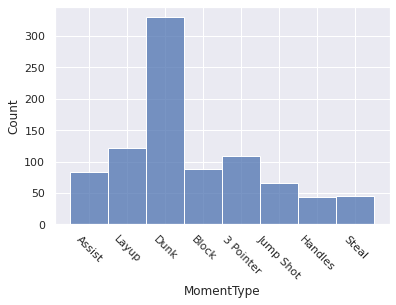

In [ ]:
sns.set()
sns.set_style('ticks')
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(data=df_topshot, x=df_topshot['MomentType'])
plt.xticks(rotation=-45)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

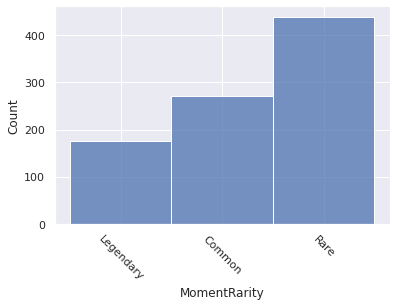

In [ ]:
sns.histplot(data=df_topshot, x=df_topshot['MomentRarity'])
plt.xticks(rotation=-45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

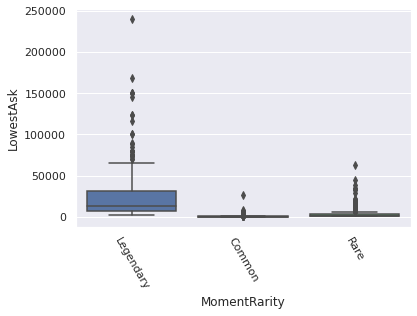

In [ ]:
sns.boxplot(data=df_topshot, x='MomentRarity', y='LowestAsk')
plt.xticks(rotation=-60)

I left this box plot in as it shows how much a few strong outliers could possibly skew the whole data set. It could be possible that these outliers cause our model to be more accurate in different areas of the price spectrum.

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

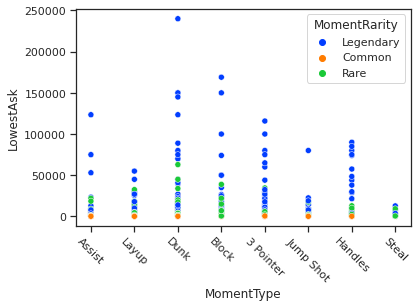

In [ ]:
sns.scatterplot(data=df_topshot, x='MomentType', y='LowestAsk', hue='MomentRarity')
plt.xticks(rotation=-45)

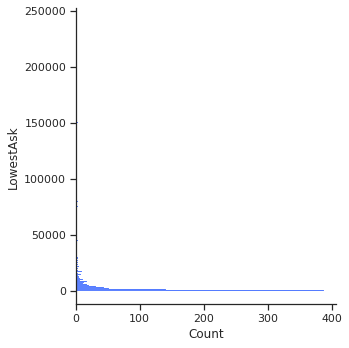

In [ ]:
sns.displot(df_topshot, y='LowestAsk')

We can see from this distribution plot that the majority of the cards are likely less than $20 000. Some small amount of cards are much more than that and cause our plots to be very zoomed out. Let's replot with a subset of the data.

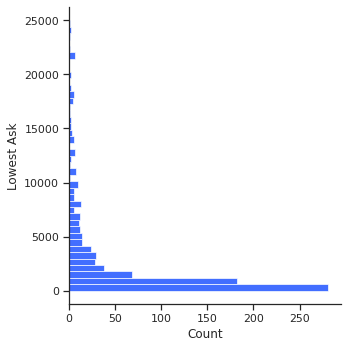

In [ ]:
sns.displot(df_topshot[df_topshot['LowestAsk']<25000], y='LowestAsk')

Lets look at the data from zero to one standard deviation above the mean. This will include ~83% of our data. This is a somewhat arbitrary cutoff but should help us visualize the prices better. 

28071


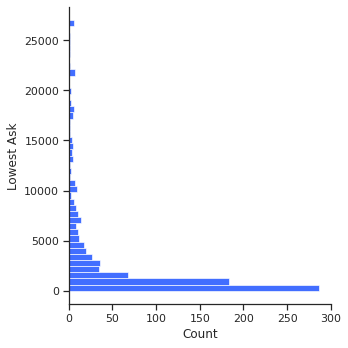

In [ ]:
one_sigma = df_topshot['LowestAsk'].mean() + df_topshot['LowestAsk'].std()
print(round(one_sigma))
sns.displot(df_topshot[df_topshot['LowestAsk']<one_sigma], y='LowestAsk')

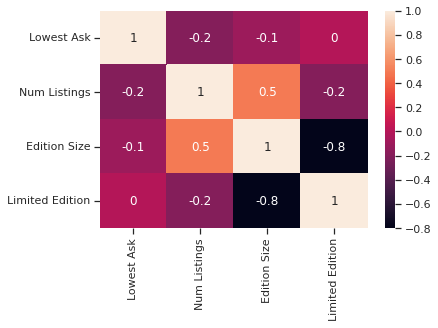

In [ ]:
sns.heatmap(df_topshot.corr().round(decimals=1), annot=True)

This correlation heat map shows only a few of the variables as most are not numeric. We will recreate the heatmap once we have done some pre-processing on our data. The strong negative correlation between Edition Size and Limited Edition is obvious and should be expected. It is interesting seeing a zero correlation between price (Lowest Ask) and Limited Edition. My first inference would be they would have a strong, positive correlation.

## <font color='lightblue'>Data preprocessing </font>

Turn the date into an ordinal variable. To do so we iterate through the rows and split the string into a list. We then reassign the year to the coloumn. 

In [ ]:
import datetime

for (index, row) in df_topshot.iterrows():
  date = df_topshot.loc[index, 'MomentDate'].split()
  year = date[2]
  df_topshot.loc[index, 'MomentDate'] = year

df_topshot['MomentDate'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: MomentDate, dtype: object

Below we use one hot encoding to convert teams and play type into binary columns. We will use ordinal encoding to convert rarity as the levels of rarity are sequential and can be ordered. 

In [ ]:
#build the ordinal encoder
encoder = OrdinalEncoder()
df_topshot[['MomentRarity', 'MomentDate']] = encoder.fit_transform(df_topshot[['MomentRarity', 'MomentDate']])
df_topshot[['MomentRarity', 'MomentDate']]

,MomentRarity,MomentDate
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
880,0.0,4.0
881,0.0,4.0
882,0.0,4.0
883,0.0,4.0


Rename the first column to be more representative.

In [ ]:
df_topshot.rename( columns={'Unnamed:0':'Player'}, inplace=True )


In [ ]:
one_hot_columns = ['Player','MomentType', 'Team', 'LimitedEdition', 'Series']
df_cat = pd.get_dummies(df_topshot[one_hot_columns])
df_topshot = pd.concat([df_topshot, df_cat], axis =1)
df_topshot.head()

,Player,MomentType,MomentDate,Team,LowestAsk,NumListings,MomentRarity,EditionSize,LimitedEdition,Series,...,Series_Rookie Debut (Series 1),Series_Run It Back (Series 1),Series_Season Tip-off (Series 2),Series_Seeing Stars (Series 2),Series_So Fresh (Series 1),Series_The Finals (Series 1),Series_The Gift (Series 2),Series_Throwdowns (Series 1),Series_Western Conference Finals (Series 1),Series_With the Strip (Series 1)
0,DANNY GREEN,Assist,3.0,LAL,4875,15,1.0,79,True,2020 NBA Finals (Series 1),...,0,0,0,0,0,0,0,0,0,0
1,TYLER HERRO,Layup,3.0,MIA,13999,12,1.0,79,True,2020 NBA Finals (Series 1),...,0,0,0,0,0,0,0,0,0,0
2,LEBRON JAMES,Dunk,3.0,LAL,70000,7,1.0,79,True,2020 NBA Finals (Series 1),...,0,0,0,0,0,0,0,0,0,0
3,JIMMY BUTLER,Dunk,3.0,MIA,10995,11,1.0,79,True,2020 NBA Finals (Series 1),...,0,0,0,0,0,0,0,0,0,0
4,RAJON RONDO,Assist,3.0,LAL,7995,9,1.0,79,True,2020 NBA Finals (Series 1),...,0,0,0,0,0,0,0,0,0,0


Drop the columns used to create one hot encoding, as the model can't deal with strings. 

In [ ]:
df_topshot.drop(one_hot_columns, axis=1, inplace=True)


Below we will split our data into a training and testing dataset. This allows us to tune our model for general use, without overfitting to our specific data.

In [ ]:
x = df_topshot.drop('LowestAsk', axis=1) #All the data we will feed into the model to predict price
y = df_topshot['LowestAsk']  #The price we are attempting to predict

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Below we want to scale our Number of Listing and Edition Size columns so all numeric values are normalized. Doing this ensures that larger numbers do not arbitrarily carry a larger prediciton weighting when building our models.

In [ ]:
from sklearn.preprocessing import StandardScaler

#build scaler
scaler = StandardScaler()

#list of variables to scale
scaling_columns = ['NumListings', 'EditionSize']
#apply it

x_train[scaling_columns] = scaler.fit_transform(x_train[scaling_columns])
x_test[scaling_columns] = scaler.fit_transform(x_test[scaling_columns])

x_train

,MomentDate,NumListings,MomentRarity,EditionSize,Player_AARON GORDON,Player_AL HORFORD,Player_ALEX CARUSO,Player_AMAR'E STOUDEMIRE,Player_ANDERSON VAREJÃO,Player_ANDRE DRUMMOND,...,Series_Rookie Debut (Series 1),Series_Run It Back (Series 1),Series_Season Tip-off (Series 2),Series_Seeing Stars (Series 2),Series_So Fresh (Series 1),Series_The Finals (Series 1),Series_The Gift (Series 2),Series_Throwdowns (Series 1),Series_Western Conference Finals (Series 1),Series_With the Strip (Series 1)
841,4.0,1.211417,2.0,0.080256,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,3.0,-0.448538,1.0,-0.364448,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
379,3.0,-0.186139,0.0,-0.150105,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110,3.0,-0.146209,0.0,-0.053087,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,2.0,0.270206,0.0,0.526540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2.0,0.949019,0.0,0.526540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,4.0,-0.397199,1.0,-0.353392,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559,3.0,-0.374382,2.0,-0.308268,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,2.0,-0.117688,2.0,-0.263143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now that we have proccessed the data using oridnal and one-hot encoding lets rebuild our correlation heatmap.

In [ ]:
df_topshot.columns[245:265]

Index(['Moment Type_3 Pointer', 'Moment Type_Assist', 'Moment Type_Block',
       'Moment Type_Dunk', 'Moment Type_Handles', 'Moment Type_Jump Shot',
       'Moment Type_Layup', 'Moment Type_Steal', 'Team_ ATL', 'Team_ BKN',
       'Team_ BOS', 'Team_ CHA', 'Team_ CHI', 'Team_ CLE', 'Team_ DAL',
       'Team_ DEN', 'Team_ DET', 'Team_ GSW', 'Team_ HOU', 'Team_ IND'],
      dtype='object')

In [ ]:
df_topshot.columns = df_topshot.columns.str.replace(' ', '')

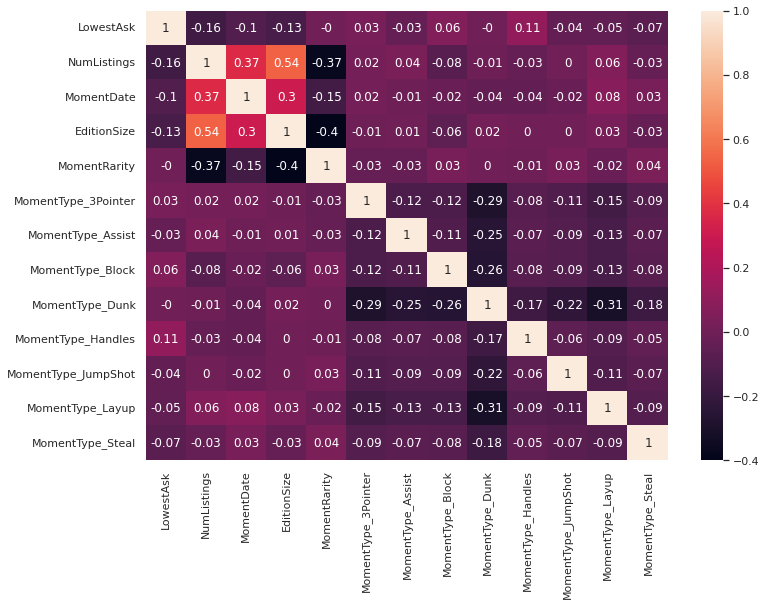

In [ ]:
corr_columns = ['LowestAsk', 'NumListings','MomentDate', 'EditionSize', 'MomentRarity','MomentType_3Pointer', 'MomentType_Assist','MomentType_Block', 'MomentType_Dunk',\
                'MomentType_Handles', 'MomentType_JumpShot', 'MomentType_Layup', 'MomentType_Steal']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_topshot[corr_columns].corr().round(decimals=2), annot=True)

I manually selected some of the variables to view correlation. Due to one-hot encoding so many classes, a heat map of all variable is unrealistic. The correlations to our target variable (Lowest Ask) are very low. This correlation method only looks at one to one correlation. There could be more complex connections between variables that we can't see at first glance.

## <font color='lightblue'>Building a Price Prediction Model</font>



The first model we will build is a regression decision tree, with supervised learning.

In [ ]:
df_topshot.dtypes

Lowest Ask                                       int64
Num Listings                                     int64
Moment Rarity                                  float64
Edition Size                                     int64
Player_AARON GORDON                              uint8
                                                ...   
Series_The Finals (Series 1)                     uint8
Series_The Gift (Series 2)                       uint8
Series_Throwdowns (Series 1)                     uint8
Series_Western Conference Finals (Series 1)      uint8
Series_With the Strip (Series 1)                 uint8
Length: 315, dtype: object

Splitting the data into validation and training sets.

In [ ]:
x_hyper_train, x_hyper_val, y_hyper_train, y_hyper_val = train_test_split(x_train, y_train, test_size=0.20)

Here we define a function to build a decision tree Regressor with an input of the max depth. This function will help us tune the model quicker.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def fit_decision_tree(maxDep):
  
  #1. build the algorithm
   tree_Regressor = DecisionTreeRegressor(max_depth=maxDep)

  #2. Fit the algorithm
   tree_Regressor_result = tree_Regressor.fit(x_hyper_train, y_hyper_train)

  #3. Make predictions
   y_pred = tree_Regressor.predict(x_hyper_val)

  #4. Meausure the accuracy
   score = tree_Regressor_result.score(x_hyper_train, y_hyper_train)

   return score

In [ ]:
maxDepth = 8
print(f'The R-squared score of our Decision Tree is {fit_decision_tree(maxDepth).round(3)}, for a tree depth of {maxDepth}.')

The R-squared score of our Decision Tree is 0.964, for a tree depth of 8.


The loop below will build a decision tree for each depth from 1 to 20. It will the R-squared score of the model and plot it to determine our best tree depth.

In [ ]:
scores = []
upperDepth = 20
for i in range(1,upperDepth):
  s = fit_decision_tree(i)
  scores.append(s.round(3))

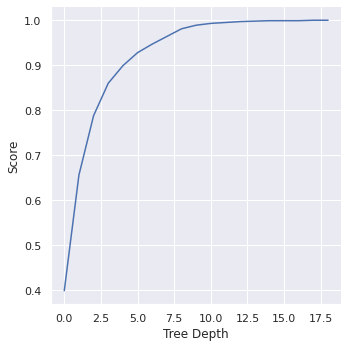

In [ ]:
#create a dataframe
df_plot_maxDep = pd.DataFrame({'score':scores, 'maxDep':range(1,upperDepth)})

#make a plot
fig = sns.relplot(data=df_plot_maxDep['score'], kind='line', )
fig.set_axis_labels('Tree Depth', 'Score')

## <font color='lightblue'>Measure performance</font>

Below we will use our testing dataset to measure the performance of the model. We redefine our regressor variables as they were built within a function and are not available on the global level. 

In [ ]:
  #1. build the algorithm
  tree_Regressor = DecisionTreeRegressor(max_depth=6)

  #2. Fit the algorithm
  tree_Regressor_result = tree_Regressor.fit(x_hyper_train, y_hyper_train)

  #3. Make predictions
  y_pred_test = tree_Regressor.predict(x_test)

  #4. Meausure the accuracy
  score = tree_Regressor_result.score(x_test, y_test)
  print(f'The score for the testing data subset is {score}.')

The score for the testing data subset is 0.34516941427201064.


We can see that as we increase the depth of our tree we quickly begin to overfit our model. We will need to do more tuning and look at other model options.

# Optimized and Likely Overfit Decision Tree

In [ ]:
maxDepth = 12
print(f'The R-squared score of our Decision Tree is {fit_decision_tree(maxDepth).round(3)}, for a tree depth of {maxDepth}.')

The R-squared score of our Decision Tree is 0.995, for a tree depth of 12.


# Random Forest

Now that we have seen how a single decision tree performs with the data lets build a random forest model to attmpt price prediction.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1. Build the model
forest_Regressor = RandomForestRegressor(n_estimators=300, bootstrap=True, max_features=0.8,max_samples=0.8)

#2. Fit the model to the data
forest_Regressor.fit(x_train, y_train)

RandomForestRegressor(max_features=0.8, max_samples=0.8, n_estimators=300)

In [ ]:
#predictions from the forest model
y_forest_pred = forest_Regressor.predict(x_test)
mse = sk.metrics.mean_squared_error(y_test, y_forest_pred)
rmse = mse**.5

print(f'The mean squared error is: {mse.round(1)}.')
print(f'The root mean squared error is: {rmse.round(1)}.')


The mean squared error is: 313249261.1.
The root mean squared error is: 17698.8.


We can utilize a grid search algorithm to determine the best hyperparameters to use in our model.

In [ ]:
from sklearn.model_selection import GridSearchCV

#define what parameters and what values to vary
parameters = {'max_features': [0.5, 0.7, 0.9],
              'n_estimators':[100, 200, 300, 400, 500],
              'max_samples':[0.5, 0.7, 0.9] }

#build the grid search algorithm
grid_search = GridSearchCV(estimator= RandomForestRegressor(), param_grid = parameters, cv=5) 

#Use training data to perform the nfold cross validation
grid_search.fit(x_train, y_train)

#find the best hyperparameters
print(grid_search.best_params_)
print(f'The R-squared score of this model is: {grid_search.best_score_}.')

{'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 400}
The R-squared score of this model is: 0.5643304236395891.


Running our grid search returns {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 400}
0.564

This gridsearch did not return great results for a prediciton model. We can try tuning the model more and look at simpler regression models.
# Let's run an optimized model.

In [ ]:
#Build the model
forest_Regressor = RandomForestRegressor(n_estimators=400, bootstrap=True, max_features=0.9,max_samples=0.9)

#Fit the model to the data
forest_Regressor_result = forest_Regressor.fit(x_train, y_train)

#predictions from the forest model
y_forest_pred = forest_Regressor.predict(x_test)

score_forest = forest_Regressor_result.score(x_train, y_train)
mse = sk.metrics.mean_squared_error(y_test, y_forest_pred)
rmse = mse**.5
print(f'The R-squared value is: {score_forest.round(1)}.')
print(f'The mean squared error is: {mse.round(1)}.')
print(f'The root mean squared error is: {rmse.round(1)}.')

The R-squared value is: 0.9.
The mean squared error is: 313249261.1.
The root mean squared error is: 17698.8.


## Let's attempt a simpler linear regression model to see how it compares.

In [ ]:
import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_linreg_train, df_linreg_test = train_test_split(df_topshot, test_size=0.20)

In [ ]:
#Build the model
linear_reg_model = smf.ols(formula='LowestAsk ~ MomentDate + NumListings + MomentRarity + EditionSize', data=df_linreg_train)

#Use the data to fit the model (i.e., find the best intercept and slope parameters)
linear_reg_results = linear_reg_model.fit()

#make predictions using the model

df_linreg_train['price_pred'] = linear_reg_results.predict(df_linreg_train) #note: using train data
df_linreg_test['price_pred'] = linear_reg_results.predict(df_linreg_test) #note: using test data

#Get a summary of the model parameters
print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:              LowestAsk   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     7.130
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.25e-05
Time:                        03:25:09   Log-Likelihood:                -8029.9
No. Observations:                 708   AIC:                         1.607e+04
Df Residuals:                     703   BIC:                         1.609e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.464e+04   3249.993      4.505   

Based off of the coefficients of our linear fit we can compare how each variable effects the model. Moment Rarity strongly effects the price outcome, with a negative slope. We can also notice that comparitevly Edition Size has only a small positive effect on the price regression. 

Calculate the mean squared error of the linear regression model.

In [ ]:
#mean squared error
mse_train = sk.metrics.mean_squared_error(df_linreg_train['LowestAsk'], df_linreg_train['price_pred']) 

print(" Mean squared error of training dataset = ", mse_train)

 Mean squared error of training dataset =  415703096.36025673


In [ ]:
#mean squared error
mse_test = sk.metrics.mean_squared_error(df_linreg_test['LowestAsk'], df_linreg_test['price_pred']) 

print(" Mean squared error of testing dataset = ", mse_test)

 Mean squared error of testing dataset =  362238039.85357165


## <font color='lightblue'>Discussion and interpretation</font>

# The results of an optimized decision tree regression model.
The R-squared score of our Decision Tree is 0.964, for a tree depth of 8.
The R-squared score of our optimized Decision Tree is 0.995, for a tree depth of 12.
With large tree depths we are likely overfitting the data. With enough depth there will become a node for each individual row of data. Simply looking for a high r-squared value doesn't neccesarily mean the model will generalize well to data it wasn't trained on. 


When the decision tree model was built with a depth of 6 nodes it had a prediction r-squared score of 0.35, on the testing data. This is a poor result and shows that although we can achieve a good fit on trainging data the model is over fitted and generalizes poorly. 

# The results of our optimized random forest regression model.
The R-squared value is: 0.9.
The mean squared error is: 313249261.
The root mean squared error is: 17698.

# Variable impact
Looking at the linear regression model we see that moment year, number of listings, and moment rarity all have a negative slope coefficent related to lowest listing price. It makes sense as to why older moments and moments with less listings may have higher prices. More investigation would be required to determine why increased rarity is connected to a strong decrease in price. 


# Overall Analysis and Future Work
I don't believe any of these models have a strong ability to predict the prices of these cards. Our large mean squared error may be due to the distribution of high priced outliers. It may be more worthwhile to look at the mean absolute error, which would be in dollars. 

The largest issue with building a model to predict price is the amount of data required in relation to the number of unique categories variables. Below we can see a few of the variables categories.

In [ ]:
uTeam = df_topshot['Team'].nunique()
print(f'The number of unique teams is {uTeam}.')

The number of unique teams is 30.


In [ ]:
uPlayer = df_topshot['Player'].nunique()
print(f'The number of unique players is {uPlayer}.')

The number of unique playerss is 241.


In [ ]:
uSeries = df_topshot['Series'].nunique()
print(f'The number of unique series is {uSeries}.')

The number of unique series is 32.


In [ ]:
uType = df_topshot['MomentType'].nunique()
print(f'The number of unique moment types is {uType}.')

The number of unique moment types is 8.


Some machine learning education sites suggest that for regression models you need 10x the number of observations as you have unique features. Using the rule of 10x we would need at least 76800 rows of data if we wanted to build a model only using moment type, series, and team. 

If we consider this model developement a proof of concept project, the key take away is that to develop an accurate model there will be significant work required to gather data. With such a wide range of prices and separate classes more data would significantly improve the model. As the marketplace has grown to thousands of daily transactions, scraping the sales data would provide us with better insight into realistic pricing. This could likely be accomplished by using a python package called 'BeautifulSoup" to web scrape the evaluate.market website. Within the last week there were 75000 transactions, so although a large data collection task it is not impossible. This data collection would be beneficial for two reasons. It would provide more data so less classes have single entries. It would also be using transaction data, instead of listing data. This would eliminate any moment listings that are unrealistic and overpriced. If the team wanted to go forward with this project it would be recommended that the model be built for a subset of this data. This could be focusing on a few key players, a certain team, or a specific type of play. 